# Question 4C
Take grayscale image of size $512\times512$, add some Gaussian noise and Perform edge detection of given the noise and clean image using ideal and Gaussian high pass filters in frequency domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def add_gaussian_noise(image, mean=0, std=1):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image+noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

### Gaussian High Pass Filter
If $D_0$ is the *cutoff frequency*, $H(u,v)$ is the output pixel of frequency domain image, $D(u,v)$ is the distance betwwen a point $(u,v)$ in the frequency domain and the center of the frequency rectangle, $P$ is the height and $Q$ is the width, then
$$H(u,v) = 1-e^{-D^2(u,v)/2{D_0}^2}$$

Where,  
$$D(u,v) = \sqrt{[(u-P/2)^2 + (v-Q/2)^2]}$$

In [3]:
def gaussian_high_pass_filter(image , cutt_off_frequecny):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    d0 = cutt_off_frequecny


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = 1 - np.exp(-d**2/(2*d0**2))
    
    filtered_image = frequncy_domain_image * my_filter

    filtered_image = np.fft.fftshift(filtered_image)
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    
    return filtered_image


### Butterworth High-pass Filter
If $D_0$ is the *cutoff frequency*, $n$ is the order, $H(u,v)$ is the output pixel of frequency domain image, $D(u,v)$ is the distance betwwen a point $(u,v)$ in the frequency domain and the center of the frequency rectangle, $P$ is the height and $Q$ is the width, then
$$H(u,v) = \frac{1}{1+[D_0/D(u,v)]^{2n}}$$

Where,  
$$D(u,v) = [(u-P/2)^2 + (v-Q/2)^2]^{\frac{1}{2}}$$

In [4]:
def butterworth_high_pass_filter(image, order, cut_off_frequency):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    n = order
    d0 = cut_off_frequency


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = 1/(1+(d0/d)**(2*n))
    
    filteredImage = frequncy_domain_image * my_filter
    filteredImage = np.fft.fftshift(filteredImage)
    filteredImage = np.abs(np.fft.ifft2(filteredImage))
    
    return filteredImage

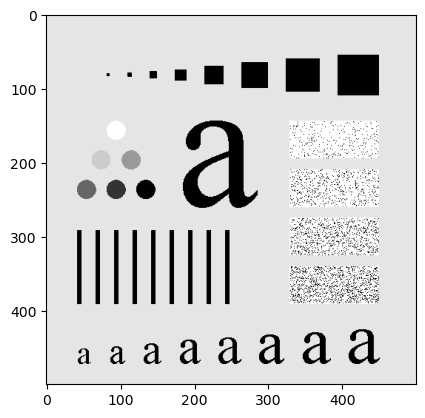

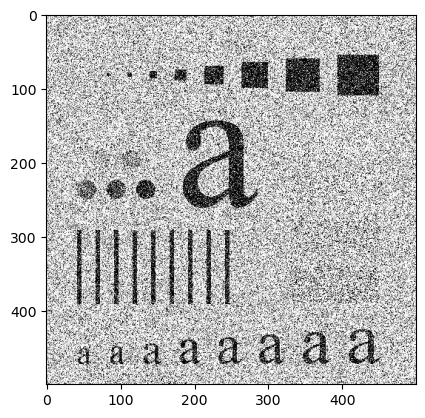

In [5]:
# opening image
original_image = plt.imread('pattern.tif').copy()
gaussian_noisy_image = add_gaussian_noise(original_image, mean=0, std=125)
plt.imshow(original_image, cmap='gray')
plt.show()

plt.imshow(gaussian_noisy_image, cmap='gray')
plt.show()

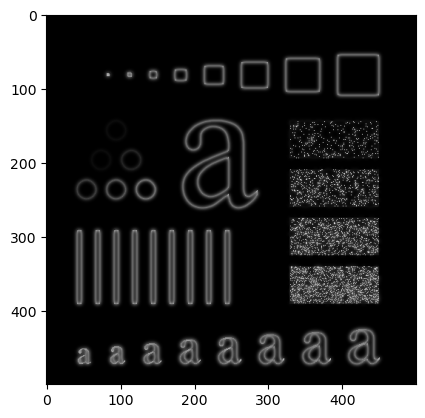

In [8]:
gaussian_edge = gaussian_high_pass_filter(original_image, 30)
plt.imshow(gaussian_edge, cmap="gray")

/tmp/ipykernel_8734/1312346821.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  my_filter[i, j] = 1/(1+(d0/d)**(2*n))


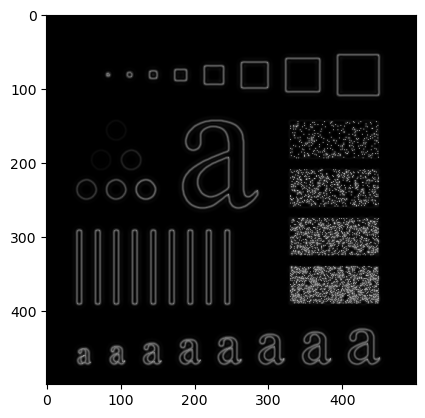

In [7]:
butterworth_edge = butterworth_high_pass_filter(original_image, 2, 60)
plt.imshow(butterworth_edge, cmap="gray")